# Comparing Transect Data at the Tanana River Test Site 

The TRTS is located near Nenana, Alaska, and was first investigated as a test site in 2008 after a CEC deployment in Eagle Alaska ended early due to debris-related issues.  Since then, it has become an established test site with modular deployment infrastructure that can be adapted for different CEC deployments. The TRTS allows CECs to be tested in a harsh environment with cold temperatures, sediment, and heavy debris, representing the conditions of many remote Alaska river communities that could greatly benefit from ME. The following example will familiarize the user with the MHKiT DOLfYN and Delft3D modules by performing a Deflt3d numerical model validation of the Tanana River Test Site (TRTS) against field data.

Start by importing the necessary python packages and MHKiT module.

In [1]:
from os.path import abspath, dirname, join, normpath, relpath
from matplotlib.pyplot import figure
import scipy.interpolate as interp
import matplotlib.pyplot as plt
from datetime import datetime
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib
import scipy.io
import netCDF4
import math
import utm

# MHKiT Imports
from mhkit.dolfyn.rotate import api as ap
from mhkit.dolfyn.adp import api
from mhkit import dolfyn as dlfn
from mhkit.river.io import d3d
from mhkit import river

## 1. Preparing the ADCP Field Data

### ADCP: Importing Data


In [2]:
# Read in the two transect passes
transect_0_raw = api.read(
    "data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_000_23-07-07_235212.PD0"
)
transect_1_raw = api.read(
    "data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_001_23-07-07_235531.PD0"
)
# Create one dataset from the two passes
transect_0_1 = xr.merge([transect_0_raw, transect_1_raw])
transect_0_1 = transect_0_1.assign_attrs(name="transect_0_1")



Reading file data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_000_23-07-07_235212.PD0 ...

Reading file data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_001_23-07-07_235531.PD0 ...


In [3]:
transect_2_raw = api.read(
    "data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_002_23-07-07_235744.PD0"
)
transect_3_raw = api.read(
    "data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_003_23-07-08_000111.PD0"
)
# Create one dataset from the two passes
transect_2_3 = xr.merge([transect_2_raw, transect_3_raw])
transect_2_3 = transect_2_3.assign_attrs(name="transect_2_3")


Reading file data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_002_23-07-07_235744.PD0 ...

Reading file data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_003_23-07-08_000111.PD0 ...


In [4]:
transect_4_raw = api.read(
    "data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_004_23-07-08_000320.PD0"
)
transect_5_raw = api.read(
    "data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_005_23-07-08_000631.PD0"
)
# Create one dataset from the two passes
transect_4_5 = xr.merge([transect_4_raw, transect_5_raw])
transect_4_5 = transect_4_5.assign_attrs(name="transect_4_5")


Reading file data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_004_23-07-08_000320.PD0 ...

Reading file data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_005_23-07-08_000631.PD0 ...


In [5]:
transect_6_raw = api.read(
    "data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_006_23-07-08_000841.PD0"
)
transect_7_raw = api.read(
    "data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_007_23-07-08_003209.PD0"
)
# Create one dataset from the two passes
transect_6_7 = xr.merge([transect_6_raw, transect_7_raw])
transect_6_7= transect_6_7.assign_attrs(name="transect_6_7")


Reading file data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_006_23-07-08_000841.PD0 ...

Reading file data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_007_23-07-08_003209.PD0 ...


In [6]:
transect_8_raw = api.read(
    "data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_008_23-07-08_003435.PD0"
)
transect_9_raw = api.read(
    "data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_009_23-07-08_003909.PD0"
)
# Create one dataset from the two passes
transect_8_9 = xr.merge([transect_8_raw, transect_9_raw])
transect_8_9  = transect_8_9 .assign_attrs(name="transect_8_9 ")


Reading file data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_008_23-07-08_003435.PD0 ...

Reading file data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_009_23-07-08_003909.PD0 ...


In [7]:
transect_10_raw = api.read(
    "data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_010_23-07-08_004209.PD0"
)
transect_11_raw = api.read(
    "data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_011_23-07-08_004623.PD0"
)
# Create one dataset from the two passes
transect_10_11 = xr.merge([transect_10_raw, transect_11_raw])
transect_10_11 = transect_10_11.assign_attrs(name="transect_10_11")



Reading file data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_010_23-07-08_004209.PD0 ...

Reading file data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_011_23-07-08_004623.PD0 ...


In [8]:
transect_12_raw = api.read(
    "data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_012_23-07-08_004858.PD0"
)
transect_13_raw = api.read(
    "data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_013_23-07-08_005327.PD0"
)
# Create one dataset from the two passes
transect_12_13 = xr.merge([transect_12_raw, transect_13_raw])
transect_12_13= transect_12_13.assign_attrs(name="transect_12_13")



Reading file data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_012_23-07-08_004858.PD0 ...

Reading file data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_013_23-07-08_005327.PD0 ...


In [9]:
transect_14_raw = api.read(
    "data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_014_23-07-08_005522.PD0"
)
transect_15_raw = api.read(
    "data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_015_23-07-08_005916.PD0"
)
# Create one dataset from the two passes
transect_14_15 = xr.merge([transect_14_raw, transect_15_raw])
transect_14_15= transect_14_15.assign_attrs(name="transect_14_15")


Reading file data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_014_23-07-08_005522.PD0 ...

Reading file data/TRTS/ADCP_transect/2023-07-07_Transects/StationTRTS_0_015_23-07-08_005916.PD0 ...


In [10]:
# Import the simulated data
d3d_data = netCDF4.Dataset("data/TRTS/D3D/TRTS_2021_2023_hydroball_vertical_viscocity.nc")



### ADCP: Convert the Coordinate System to UTM

By default, the ADCP coordinates are stored as latitude and longitude coordinates. However, latitude and longitude cannot be directly converted to a distance therefor here we convert from latitude and longitude to $UTM_x$ and $UTM_y$. This gives us the ability to calculate the linear line of best fit for the idealized transect.

In [11]:
xarray_names=[transect_0_1,
                transect_2_3,
                transect_4_5,
                transect_6_7,
                transect_8_9, 
                transect_10_11,
                transect_12_13,
                transect_14_15]


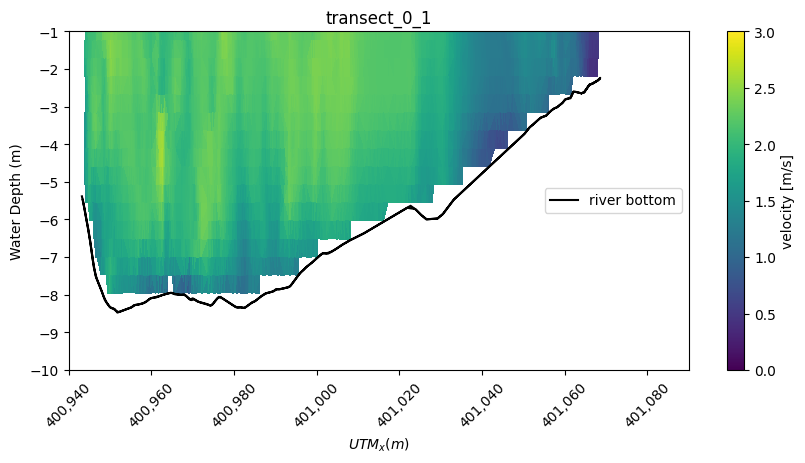

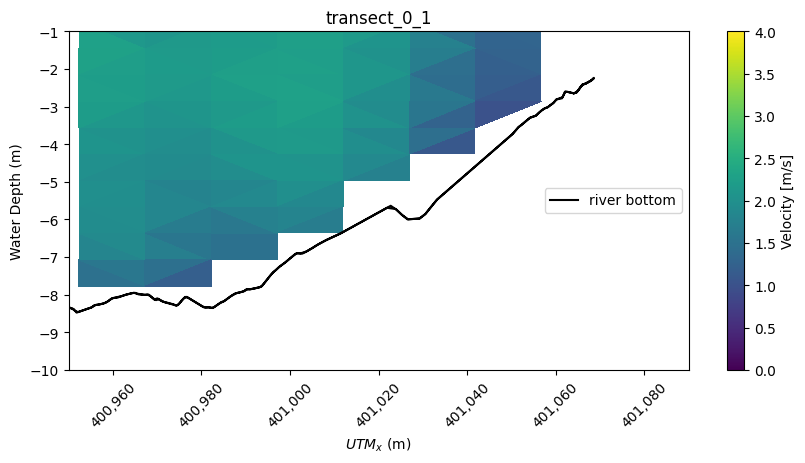

Exception: Coordinates not recognized.

In [12]:
# Convert Coordiantes to UTM using utm module
angle = 15.4
offset = 0.35 
min_correlation = 40
N = 10
N_layers = 12

for name in xarray_names:
    ap.set_declination(name, angle, inplace=True)
    api.rotate2(name, "earth", inplace=True)
    api.clean.set_range_offset(name, offset)
    name= api.clean.correlation_filter(name, thresh=min_correlation)
    
    #Ideal transect 
    utm_x_y = utm.from_latlon(name.latitude_gps, name.longitude_gps, 6, "W")
    gps = [[x, y] for x, y in zip(utm_x_y[0], utm_x_y[1])]
    gps_points = pd.DataFrame(np.array(gps), columns=["utm_x", "utm_y"])
    # Linear regression using first order polyfit
    a, b = np.polyfit(gps_points.utm_x, gps_points.utm_y, 1)
    # Generate a DataFrame of points from the linear regression
    ideal = [[x, y] for x, y in zip(gps_points.utm_x, a * gps_points.utm_x + b)]
    ideal_points = pd.DataFrame(np.array(ideal), columns=["utm_x", "utm_y"])
    ADCP_ideal_points = {
        "utm_x": np.tile(gps_points.utm_x, np.size(name.range)),
        "utm_y": np.tile(a * gps_points.utm_x + b, np.size(name.range)),
        "waterdepth": np.repeat(name.range, np.size(gps_points.utm_x)),
    }
    ADCP_ideal_points = pd.DataFrame(ADCP_ideal_points)

    # Bottom Filter
    # Filtering out depth sounder values above the river surface
    depth_sounder = name.where(name.dist_bt > 0)
    # Of the 4 values beams get the shallowest depth value at each location
    bottom = np.min(depth_sounder.dist_bt, axis=0)
    # River bottom for ideal transect
    bottom_avg = interp.griddata(gps_points, bottom, ideal_points, method="linear")
    # Create a matrix of depths
    bottom_filter = d3d.create_points(
        x=bottom_avg, y=name.range.to_numpy(), waterdepth=1
    )
    # Creating a mask matrix with ones in the area of the river cross section and nan's outside
    river_bottom_filter = []
    for index, row in bottom_filter.iterrows():
        if row["x"] > row["y"]:
            filter = 1
        else:
            filter = float("nan")
        river_bottom_filter = np.append(river_bottom_filter, filter)

        # Tiling the GPS data for each depth bin
    gps_utm_x = np.tile(gps_points.utm_x, np.size(name.range))
    gps_utm_y = np.tile(gps_points.utm_y, np.size(name.range))

    # Repeating the depth bins for each GPS point
    depth = np.repeat(name.range, np.size(gps_points.utm_x))

    # Create Dataframe from the calculated points
    ADCP_points = pd.DataFrame(
        {"utm_x": gps_utm_x, "utm_y": gps_utm_y, "waterdepth": depth}
    )

    # Raveling the veocity data to correspond with 'ADCP_points' and filtering out velocity data bellow the river bottom
    ADCP_points["east_velocity"] = np.ravel(name.vel[0, :, :]) * river_bottom_filter
    ADCP_points["north_velocity"] = (
        np.ravel(name.vel[1, :, :]) * river_bottom_filter
    )
    ADCP_points["vertical_velocity"] = (
        np.ravel(name.vel[2, :, :]) * river_bottom_filter
    )
    ADCP_points = ADCP_points.dropna()

    # Project velocity onto ideal tansect
    ADCP_ideal = pd.DataFrame()
    ADCP_ideal["east_velocity"] = interp.griddata(
        ADCP_points[["utm_x", "utm_y", "waterdepth"]],
        ADCP_points["east_velocity"],
        ADCP_ideal_points[["utm_x", "utm_y", "waterdepth"]],
        method="linear",
    )
    ADCP_ideal["north_velocity"] = interp.griddata(
        ADCP_points[["utm_x", "utm_y", "waterdepth"]],
        ADCP_points["north_velocity"],
        ADCP_ideal_points[["utm_x", "utm_y", "waterdepth"]],
        method="linear",
    )
    ADCP_ideal["vertical_velocity"] = interp.griddata(
        ADCP_points[["utm_x", "utm_y", "waterdepth"]],
        ADCP_points["vertical_velocity"],
        ADCP_ideal_points[["utm_x", "utm_y", "waterdepth"]],
        method="linear",
    )

    # Calculate the magnitude of the velocity components
    ADCP_ideal["magnitude"] = np.sqrt(
        ADCP_ideal.east_velocity**2
        + ADCP_ideal.north_velocity**2
        + ADCP_ideal.vertical_velocity**2
    )
    # Set the contour color bar bounds
    min_plot = 0
    max_plot = 3

    # The Contour of velocity magnitude from the ADCP transect data
    fig, ax = plt.subplots(figsize=(10, 4.4))

    contour_plot = plt.tripcolor(
        ADCP_ideal_points.utm_x,
        -ADCP_ideal_points.waterdepth,
        ADCP_ideal.magnitude * river_bottom_filter,
        vmin=min_plot,
        vmax=max_plot,
    )

    plt.xlabel("$UTM_x (m)$")
    plt.ylabel("Water Depth (m)")
    cbar = plt.colorbar(contour_plot)
    cbar.set_label("velocity [m/s]")
    plt.ylim([-10, -1])
    plt.xlim([400940, 401090])
    plt.plot(ideal_points.utm_x, -bottom_avg, "k", label="river bottom")
    plt.legend(loc=7)
    ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ","))
    )
    plt.xticks(rotation=45)
    plt.title(name.name)
    plt.show()


        # Interpolate points by getting min & max first
    start_utmx = min(ADCP_ideal_points.utm_x)
    start_utmy = min(ADCP_ideal_points.utm_y)

    end_utmx = max(ADCP_ideal_points.utm_x)
    end_utmy = min(ADCP_ideal_points.utm_y)

    # Using N points for x calculate the y values on an ideal transect from the linear regression used earlier
    
    utm_x_ideal_downsampeled = np.linspace(start_utmx, end_utmx, N)
    utm_y_ideal_downsampeled = (a * utm_x_ideal_downsampeled) + b
    # Create an idealized depth N layers deep
    
    downsampled_depth = np.linspace(
        name.range.min(), np.nanmax(bottom_avg), N_layers
    )

    # Create a Dataframe of our idealized x,y,depth points
    ADCP_ideal_points_downsamples = pd.DataFrame(
        {
            "utm_x": np.tile(utm_x_ideal_downsampeled, N_layers),
            "utm_y": np.tile(utm_y_ideal_downsampeled, N_layers),
            "waterdepth": np.repeat(downsampled_depth, N),
        }
    )


    # Create a DataFrame of downsampled points
    ideal_downsampeled = [
        [x, y] for x, y in zip(utm_x_ideal_downsampeled, utm_y_ideal_downsampeled)
    ]
    ideal_points_downsampled = pd.DataFrame(
        np.array(ideal_downsampeled), columns=["utm_x", "utm_y"]
    )

    # River bottom for downsampled ideal transect
    bottom_avg_downsampled = interp.griddata(
        gps_points, bottom, ideal_points_downsampled, method="linear"
    )

    # Create a matrix of depths
    bottom_filter_downsampled = d3d.create_points(
        x=bottom_avg_downsampled, y=downsampled_depth, waterdepth=1
    )

    # Creating a mask matrix with ones in the area of the river cross section and nan's outside
    river_bottom_filter_downsampled = []
    for index, row in bottom_filter_downsampled.iterrows():
        if row["x"] > row["y"]:
            filter = 1
        else:
            filter = float("nan")
        river_bottom_filter_downsampled = np.append(river_bottom_filter_downsampled, filter)

    # Project velocity onto ideal tansect
    ADCP_ideal_downsamples = pd.DataFrame()
    ADCP_ideal_downsamples["east_velocity"] = interp.griddata(
        ADCP_points[["utm_x", "utm_y", "waterdepth"]],
        ADCP_points["east_velocity"],
        ADCP_ideal_points_downsamples[["utm_x", "utm_y", "waterdepth"]],
        method="linear",
    )
    ADCP_ideal_downsamples["north_velocity"] = interp.griddata(
        ADCP_points[["utm_x", "utm_y", "waterdepth"]],
        ADCP_points["north_velocity"],
        ADCP_ideal_points_downsamples[["utm_x", "utm_y", "waterdepth"]],
        method="linear",
    )
    ADCP_ideal_downsamples["vertical_velocity"] = interp.griddata(
        ADCP_points[["utm_x", "utm_y", "waterdepth"]],
        ADCP_points["vertical_velocity"],
        ADCP_ideal_points_downsamples[["utm_x", "utm_y", "waterdepth"]],
        method="linear",
    )
    ADCP_ideal_downsamples["magnitude"] = np.sqrt(
        ADCP_ideal_downsamples.east_velocity**2
        + ADCP_ideal_downsamples.north_velocity**2
        + ADCP_ideal_downsamples.vertical_velocity**2
    )
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 4.4))
    contour_plot = plt.tripcolor(
        ADCP_ideal_points_downsamples.utm_x,
        -ADCP_ideal_points_downsamples.waterdepth,
        ADCP_ideal_downsamples.magnitude,# river_bottom_filter_downsampled,
        vmin=min_plot,
        vmax=4,
    )

    # Plot river bottom for comparison
    plt.plot(ideal_points.utm_x, -bottom_avg, "k", label="river bottom")

    # Plot Settings
    plt.xlabel("$UTM_x$ (m)")
    plt.ylabel("Water Depth (m)")
    cbar = plt.colorbar(contour_plot)
    cbar.set_label("Velocity [m/s]")
    plt.ylim([-10, -1])
    plt.xlim([400950, 401090])
    plt.legend(loc=7)
    ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ","))
    )
    plt.xticks(rotation=45)
    plt.title(name.name)
    plt.show()

    # Get the ADCP sample points
    ADCP_ideal_points_downsamples_xy = ADCP_ideal_points_downsamples.rename(
    columns={"utm_x": "x", "utm_y": "y"}
    )

    variables = ["mesh2d_ucx", "mesh2d_ucy", "mesh2d_ucz"]
    D3D = d3d.variable_interpolation(
        d3d_data, variables, points=ADCP_ideal_points_downsamples_xy, edges= 'nearest'
    )
    # Calculate the magnitude of the velocity
    D3D["magnitude"] = np.sqrt(D3D.mesh2d_ucy**2 + D3D.mesh2d_ucx**2 + D3D.mesh2d_ucz**2)
    
    # Plot Delft3D interpolated Data
    fig, ax = plt.subplots(figsize=(10, 4.4))
    contour_plot = plt.tripcolor(
        D3D.x,
        -D3D.waterdepth,
        D3D.magnitude* river_bottom_filter_downsampled,
        vmin=min_plot,
        vmax=3,
        # shading='gouraud'
        alpha=1,
    )

    # Plot the river bottom calculated frol ADCP for comparison
    plt.plot(ideal_points.utm_x, -bottom_avg, "k", label="river bottom")

    # Figure settings
    plt.xlabel("$UTM_x (m)$")
    plt.ylabel("Water Depth (m)")
    cbar = plt.colorbar(contour_plot)
    cbar.set_label("velocity [m/s]")
    #plt.ylim([-8.5, -1])
    plt.xlim([400960, 401090])
    plt.legend(loc=7)
    ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ","))
    )
    plt.xticks(rotation=45)
    plt.title(name.name)
    plt.show()


In [12]:
## Initialize the figure
#figure(figsize=(8, 6))
#fig, ax = plt.subplots()

# Get data from the original transect in UTM for comparison
#transect_1 = utm.from_latlon(
#    transect_1_raw.latitude_gps, transect_1_raw.longitude_gps, 6, "W"
#)
#transect_2 = utm.from_latlon(
#    transect_2_raw.latitude_gps, transect_2_raw.longitude_gps, 6, "W"
#)

## Plot the original transect data for comparison
#plt.plot(transect_1[0], transect_1[1], "b", label="GPS Transect 1")
#plt.plot(transect_2[0], transect_2[1], "r--", label="GPS Transect 2")

## Plot the Idealized Transect
#plt.plot(
#    ADCP_ideal_points.utm_x, ADCP_ideal_points.utm_y, "k-.", label="Ideal Transect"
#)
#plt.ticklabel_format(style="scientific", useOffset=False)
#ax.get_xaxis().set_major_formatter(
#    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ","))
#)
#plt.xticks(rotation=45)

## Plot Settings
#plt.legend()
#plt.xlabel("$UTM_x (m)$")
#plt.ylabel("$UTM_y (m)$")

### ADCP: Get Original Transect Data 

Here we create a DataFrame of the original velocity components from the transect data. This DataFrame will be used to interpolate the velocity data onto the ideal transect.

### ADCP: Interpolating Velocities for Ideal Transect 

Using the original transect data saved in `ADCP_points` the velocity values are interpolated onto the ideal transect points using the scipy interpolate `griddata` function. 

 ## 2. Delft3D Data
 
Typically researchers use a modeling tool such as Deflt3D which, relative to field deployments, can perform low-cost simulations where changes to the environment can be implemented and interpreted quickly. This allows researchers to narrow in on a limited design set for field investigation thereby increasing the efficiency of field deployments. To initiate the numerical model, a 2010 bathymetry survey taken by Terrasond under contract to the University of Alaska Fairbanks (UAF) was used to represent the domain. This domain was discretized using the Delft3D built-in mesh generation tool, RGF grid, to roughly 5m x 5m unstructured squares from a bird's eye view. Delft3D represents depth using shallow water equations with a sigma layer approach which distributes the layers between the specified bottom of the river and the water level. An initial 12 sigma layers were specified to compare to filed data for this study. The domain was simulated in Delft3D at a constant discharge of $1789 
 m^{3}/s$ and a $2.7 m$ water level, as recorded by the USGS survey station for August $10^{th}$ 2010.  The simulation shown in the example is designed to match the experimental conditions of when the ADCP plotted above was collected. The Delft3D model takes inputs of water level, discharge, and the river bathymetry. The United States Geological Survey (USGS) has a data collection downstream of the TRTS (station:"15515500"). The water level and discharge are taken from the USGS data, and the bathymetry data was collected in is the summer of 2010. In this example we will show how to get data from the USGS station and then jump to analyzing the output from the Delft3D model.
 

### D3D: USGS Water Level
The United States Geological Survey has a nearby survey station (#15515500) downstream of the TRTS which records discharge and water level. The MHKiT River module has the capability to request data from USGS survey stations as demonstrated in the river example. Using MHKiT's river module the water level for the USGS station was collected for the same day as the ADCP data was collected. The USGS assigns a parameter number of '00065' for water level or Gage height. The water level was averaged to be roughly 2.7m. This number is directly input into the Delft3D model and isn't used in this example notebook. Further examples of using the river module are shown in the `river_example`. Similar to the water level the discharge was found using the same MHKit river module except swapping out the parameter number for '00060' to get the discharge data. The discharge was averaged to be 1789 $m^3/s$. This value was also directly input to the Delft3D model and isn't used in this example notebook.

Text(0, 0.5, 'Dischage ($f^3/s$)')

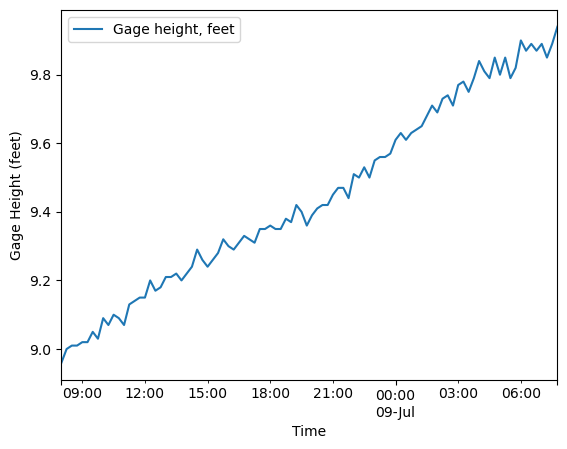

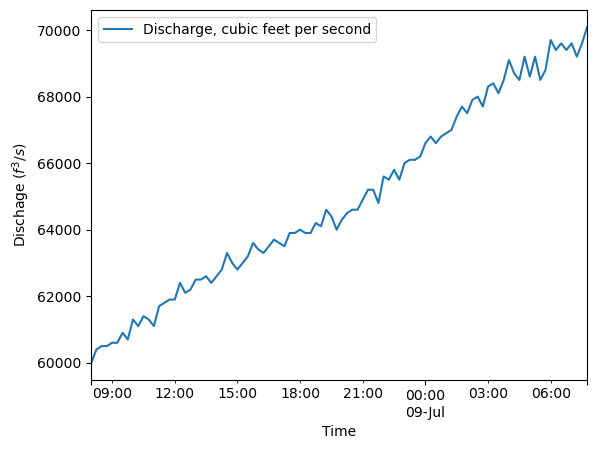

In [21]:
# Use the requests method to obtain 1 day of instantneous gage height data
water_level_USGS_data = river.io.usgs.request_usgs_data(
    station="15515500",
    parameter="00065",
    start_date="2023-07-08",
    end_date="2023-07-08",
    data_type="Instantaneous",
)

# Plot data
water_level_USGS_data.plot()

# Plot Settings
plt.xlabel("Time")
plt.ylabel("Gage Height (feet)")

# Use the requests method to obtain 1 day of instantneous discharge data
discharge_USGS_data = river.io.usgs.request_usgs_data(
    station="15515500",
    parameter="00060",
    start_date="2023-07-08",
    end_date="2023-07-08",
    data_type="Instantaneous",
)

# Print data
discharge_USGS_data.plot()
# Plot Settings
plt.xlabel("Time")
plt.ylabel("Dischage ($f^3/s$)")

In [22]:
discharge_USGS_data.max()*0.0283168

Discharge, cubic feet per second    1985.00768
dtype: float64

In [23]:
water_level_USGS_data.max()*0.3048+114.75

Gage height, feet    117.779712
dtype: float64

In [24]:
2.286+114.75


117.036

### D3D: Importing Delft3D Data 
Here we are importing the NetCDF data exported by the Delft3D simulation described in the Delft3D introduction.

In [25]:
# Import the simulated data
d3d_data = netCDF4.Dataset("data/TRTS/D3D/TRTS_2021_2023_hydroball_vertical_viscocity.nc")

# Get the ADCP sample points
ADCP_ideal_points_downsamples_xy = ADCP_ideal_points_downsamples.rename(
    columns={"utm_x": "x", "utm_y": "y"}
)


In [26]:
for var in d3d_data.variables.keys():
    try:
        d3d_data[var].long_name
    except:
        print(f'"{var}"')
    else:
        print(f'"{var}": {d3d_data[var].long_name}')

"projected_coordinate_system"
"mesh2d": Topology data of 2D mesh
"mesh2d_node_x": x-coordinate of mesh nodes
"mesh2d_node_y": y-coordinate of mesh nodes
"mesh2d_node_z": z-coordinate of mesh nodes
"mesh2d_edge_x": characteristic x-coordinate of the mesh edge (e.g. midpoint)
"mesh2d_edge_y": characteristic y-coordinate of the mesh edge (e.g. midpoint)
"mesh2d_edge_nodes": Start and end nodes of mesh edges
"mesh2d_face_nodes": Vertex nodes of mesh faces (counterclockwise)
"mesh2d_edge_faces": Neighboring faces of mesh edges
"mesh2d_face_x": Characteristic x-coordinate of mesh face
"mesh2d_face_y": Characteristic y-coordinate of mesh face
"mesh2d_face_x_bnd": x-coordinate bounds of mesh faces (i.e. corner coordinates)
"mesh2d_face_y_bnd": y-coordinate bounds of mesh faces (i.e. corner coordinates)
"mesh2d_layer_sigma": Sigma coordinate of layer centres
"mesh2d_interface_sigma": Sigma coordinate of layer interfaces
"mesh2d_edge_type": edge type (relation between edge and flow geometry)
"me

In [27]:
#ADCP_ideal_points_downsamples_xy.waterdepth=ADCP_ideal_points_downsamples_xy.waterdepth-114.75
ADCP_ideal_points_downsamples_xy

,x,y,waterdepth
0,400948.728297,7.161181e+06,0.410000
1,400962.931236,7.161185e+06,0.410000
2,400977.134176,7.161190e+06,0.410000
3,400991.337115,7.161194e+06,0.410000
4,401005.540054,7.161199e+06,0.410000
...,...,...,...
115,401019.742994,7.161203e+06,8.461812
116,401033.945933,7.161208e+06,8.461812
117,401048.148872,7.161212e+06,8.461812
118,401062.351812,7.161217e+06,8.461812


### D3D: Ideal Transect Data
Next, we get the velocity data at the same points as the down-sampled ideal ADCP data. In Delft3D velocity in the y direction is `ucy`, velocity in the x direction is `ucx` and velocity in the z direction is `ucz`. From these velocity components the velocity magnitude is calculated using the root mean squared formula.

In [28]:
# Interpolate the Delft3D simulated data onto the the sample points
#variables = ["mesh2d_s1"]
#D3D_water_level = d3d.variable_interpolation(
#    d3d_data, variables, points=ADCP_ideal_points_downsamples_xy, edges= 'nearest'
#)
#variables = ["mesh2d_waterdepth"]
#D3D_waterdepth = d3d.variable_interpolation(
#    d3d_data, variables, points=ADCP_ideal_points_downsamples_xy, edges= 'nearest'
#)


In [13]:
variables = ["mesh2d_ucx", "mesh2d_ucy", "mesh2d_ucz"]
D3D = d3d.variable_interpolation(
    d3d_data, variables, points=ADCP_ideal_points_downsamples_xy, edges= 'nearest'
)
# Calculate the magnitude of the velocity
D3D["magnitude"] = np.sqrt(D3D.mesh2d_ucy**2 + D3D.mesh2d_ucx**2 + D3D.mesh2d_ucz**2)

Exception: Coordinates not recognized.

In [30]:
variable = "mesh2d_waterdepth"
var_data_df = d3d.get_all_data_points(d3d_data, variable, time_index=4)

In [31]:
var_data_df.waterdepth.max()

12.699487975086129

(array([400600., 400700., 400800., 400900., 401000., 401100., 401200.,
        401300., 401400., 401500.]),
 [Text(400600.0, 0, '400600'),
  Text(400700.0, 0, '400700'),
  Text(400800.0, 0, '400800'),
  Text(400900.0, 0, '400900'),
  Text(401000.0, 0, '401000'),
  Text(401100.0, 0, '401100'),
  Text(401200.0, 0, '401200'),
  Text(401300.0, 0, '401300'),
  Text(401400.0, 0, '401400'),
  Text(401500.0, 0, '401500')])

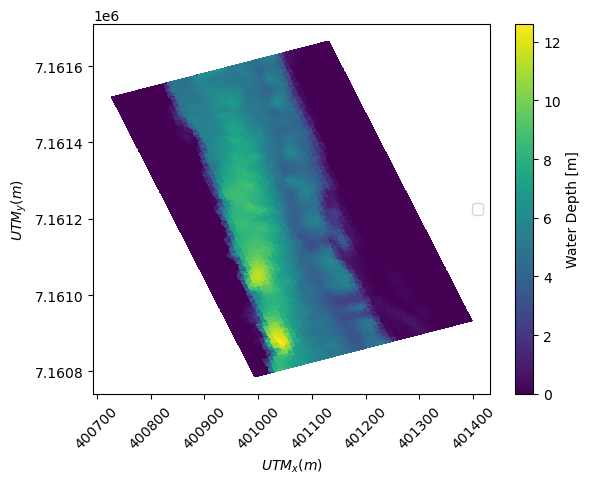

In [32]:

depth_contour_plot = plt.tripcolor(
    var_data_df.x,
    var_data_df.y,
    var_data_df.waterdepth,
    #vmin=min_plot,
    #vmax=4,
    # shading='gouraud'
    alpha=1,
)

# Figure settings
plt.xlabel("$UTM_x (m)$")
plt.ylabel("$UTM_y (m)$")
cbar = plt.colorbar(depth_contour_plot)
cbar.set_label("Water Depth [m]")
#plt.ylim([-8.5, -1])
#plt.xlim([400960, 401090])
plt.legend(loc=7)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ","))
)
plt.xticks(rotation=45)

Using our Delft3D velocity magnitude a contour plot is created. The results are plotted with the original ideal ADCP river bottom for reference.

In [33]:
D3D.magnitude.describe()

count    120.000000
mean       1.895274
std        0.434225
min        1.047165
25%        1.560212
50%        2.067733
75%        2.271975
max        2.396330
Name: magnitude, dtype: float64

In [34]:
(D3D.magnitude*river_bottom_filter_downsampled).describe()

count    69.000000
mean      2.135928
std       0.247362
min       1.560212
25%       2.007290
50%       2.129126
75%       2.339263
max       2.396330
Name: magnitude, dtype: float64

(array([400960., 400980., 401000., 401020., 401040., 401060., 401080.,
        401100.]),
 [Text(400960.0, 0, '400,960'),
  Text(400980.0, 0, '400,980'),
  Text(401000.0, 0, '401,000'),
  Text(401020.0, 0, '401,020'),
  Text(401040.0, 0, '401,040'),
  Text(401060.0, 0, '401,060'),
  Text(401080.0, 0, '401,080'),
  Text(401100.0, 0, '401,100')])

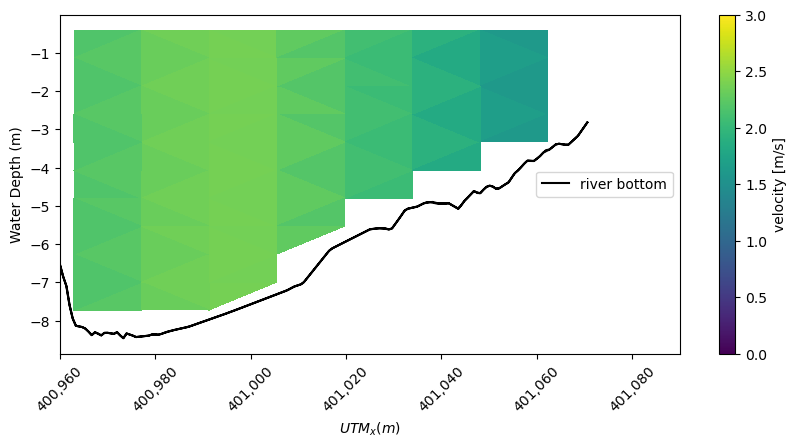

In [35]:
# Plot Delft3D interpolated Data
fig, ax = plt.subplots(figsize=(10, 4.4))
contour_plot = plt.tripcolor(
    D3D.x,
    -D3D.waterdepth,
    D3D.magnitude* river_bottom_filter_downsampled,
    vmin=min_plot,
    vmax=3,
    # shading='gouraud'
    alpha=1,
)

# Plot the river bottom calculated frol ADCP for comparison
plt.plot(ideal_points.utm_x, -bottom_avg, "k", label="river bottom")

# Figure settings
plt.xlabel("$UTM_x (m)$")
plt.ylabel("Water Depth (m)")
cbar = plt.colorbar(contour_plot)
cbar.set_label("velocity [m/s]")
#plt.ylim([-8.5, -1])
plt.xlim([400960, 401090])
plt.legend(loc=7)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ","))
)
plt.xticks(rotation=45)

## 3. Error Calulations
Data from Delft3D and the ADCP were now on an equivalent set of points in our data processing environment. For comparison the $L_1$, $L_2$, and $L_{\infty}$ norms were calculated for the Delft3D transect, and the down-sampled ADCP data. The L1 norm is equal to the absolute value of the difference between modeled and measured velocities, Delft3D and ADCP, respectively, over the measured velocity. This gives a fraction that can be converted into the percent difference between measured and modeled velocities. The mean absolute error (MAE) in is an average value of L1. The error calculation process was repeated to calculate the L2 norm which is commonly referred to as the mean squared error (MSE). $L_1$, $L_2$, and $L_{\infty}$ are dimensionless.

### Error:  L1 

$L_1= \frac{|D3D-ADCP|}{ADCP}$

$L_1$ is a dimensionless value equal to the difference between the modeled and measured value divided by the actual value. In this case the measured ADCP is considered to be the actual value.

In [36]:
# L1
L1_Magnitude = (
    abs(ADCP_ideal_downsamples.magnitude - D3D.magnitude)
    / ADCP_ideal_downsamples.magnitude
)

Similar to the `river_bottom_filter` this filter replaces extreme values (100%) values with 'nan' and is then combined with the `river_bottom_filter` to create `error_filter`. 

In [37]:
river_bottom_edge_filter_downsampled = []
for i in L1_Magnitude:
    if 1 > i:
        filter = 1
    else:
        filter = float("nan")
    river_bottom_edge_filter_downsampled = np.append(
        river_bottom_edge_filter_downsampled, filter
    )

error_filter = river_bottom_edge_filter_downsampled * river_bottom_filter_downsampled

The mean absolute error (MAE) is the average $L_1$ error over the transect area. The MAE is displayed with the fil contour plot of $L_1$. $N$ is equation is equle to the number of points in the river cross-sectional area. 

$MAE= \frac{\sum{L_1}}{N}$

In [38]:
# Calculate and priont the Mean Absolute Error
MAE = np.sum(L1_Magnitude * error_filter) / len(L1_Magnitude[L1_Magnitude < 1000])
MAE

0.1492904779996135

(array([400960., 400980., 401000., 401020., 401040., 401060., 401080.,
        401100.]),
 [Text(400960.0, 0, '400,960'),
  Text(400980.0, 0, '400,980'),
  Text(401000.0, 0, '401,000'),
  Text(401020.0, 0, '401,020'),
  Text(401040.0, 0, '401,040'),
  Text(401060.0, 0, '401,060'),
  Text(401080.0, 0, '401,080'),
  Text(401100.0, 0, '401,100')])

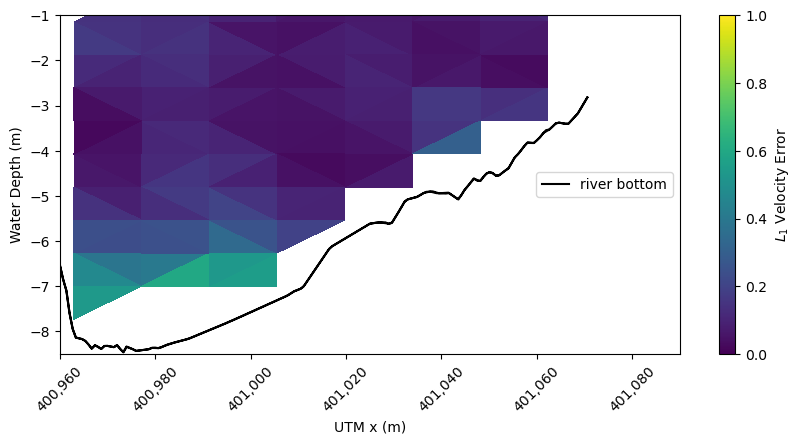

In [39]:
# Set the min and max error values
max_plot_error = 1
min_plot_error = 0

# Plotting the L1 error
fig, ax = plt.subplots(figsize=(10, 4.4))
contour_plot_L1 = plt.tripcolor(
    D3D.x,
    -D3D.waterdepth,
    L1_Magnitude * error_filter,
    vmin=min_plot_error,
    vmax=max_plot_error,
)

# Plot the river bottom for comparison
plt.plot(ideal_points.utm_x, -bottom_avg, "k", label="river bottom")

# Plot settings
plt.xlim([400960, 401090])
plt.ylim([-8.5, -1])
plt.xlabel("UTM x (m)")
plt.ylabel("Water Depth (m)")
cbar = plt.colorbar(contour_plot_L1)
cbar.set_label("$L_1$ Velocity Error")
plt.legend(loc=7)

ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ","))
)
plt.xticks(rotation=45)

### Error: L2

$L_2=\left(\frac{D3D-ADCP}{ADCP}\right)^2$

$L_2$ is similar to $L_1$ except $L_2$ squares the difference between the modeled and measured values.

In [40]:
# L2
L2_Magnitude = (
    (ADCP_ideal_downsamples.magnitude - D3D.magnitude)
    / ADCP_ideal_downsamples.magnitude
) ** 2

The mean squared error (MSE) is the average of $L_2$ error over the transect area. $N$ is equation is equle to the number of points in the river cross-sectional area. 


$MSE= \frac{\sum{L_2}}{N}$

In [41]:
MSE = np.sum(L2_Magnitude * error_filter) / np.size(L2_Magnitude[L2_Magnitude < 1000])
MSE

0.04877868538163196

(array([400960., 400980., 401000., 401020., 401040., 401060., 401080.,
        401100.]),
 [Text(400960.0, 0, '400,960'),
  Text(400980.0, 0, '400,980'),
  Text(401000.0, 0, '401,000'),
  Text(401020.0, 0, '401,020'),
  Text(401040.0, 0, '401,040'),
  Text(401060.0, 0, '401,060'),
  Text(401080.0, 0, '401,080'),
  Text(401100.0, 0, '401,100')])

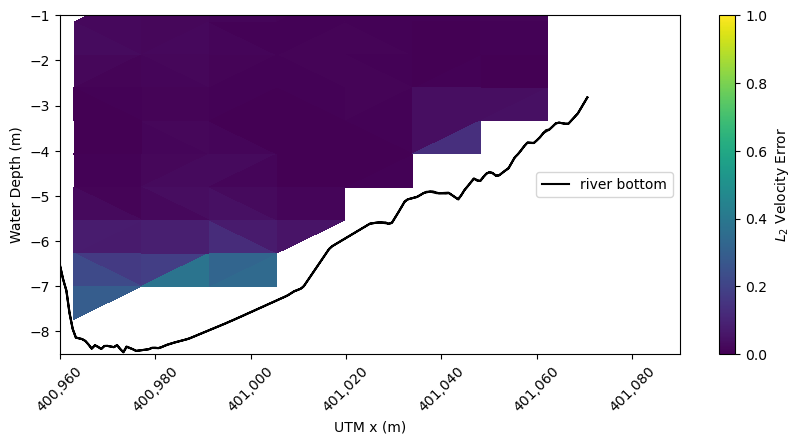

In [42]:
# Create a contour plot of the error
# Plotting
fig, ax = plt.subplots(figsize=(10, 4.4))
contour_plot_L2 = plt.tripcolor(
    D3D.x,
    -D3D.waterdepth,
    L2_Magnitude * error_filter,
    vmin=min_plot_error,
    vmax=max_plot_error,
)

# Plot the river bottom for comparison
plt.plot(ideal_points.utm_x, -bottom_avg, "k", label="river bottom")

# Plot settings
plt.xlim([400960, 401090])
plt.ylim([-8.5, -1])
plt.xlabel("UTM x (m)")
plt.ylabel("Water Depth (m)")
cbar = plt.colorbar(contour_plot_L2)
cbar.set_label("$L_2$ Velocity Error")
plt.legend(loc=7)

ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ","))
)
plt.xticks(rotation=45)

### Error: $L_\infty$

$L_\infty = max(L_1)$

$L_\infty$ is the maximum L1 error 

In [43]:
# L inf
L_inf = np.nanmax(L1_Magnitude * error_filter)
L_inf

0.8053485889191354

## 4. Discussion

A model verification using simulated data of TRTS was compared to field data collected in 2010 using MHKiT. This example showcased the functionality of the MHKiT river and DOLfYN modules using a real-world study. The findings demonstrated how MHKiT modules may be combined to analyze simulated data and collected field data in a simple and quick manner. Other transect plotting software run separately from data analysis software. MHKiT's ability to process data from multiple common marine energy sources will help ME practitioners reach unique and novel results quickly by eliminating much of the start-up processing scripts most analysts must perform and maintain today. Although this is a river example, this framework of analysing modeled data and comparing it to wave and tidal experimental data is possible as well.

The high error values found between the model and field data were expected for a first attempt on a coarse numerical model domain. The coarse model domain allows MHKiT to host the data in this repository for public use and replication of this study's results. This example further allows users to swap in their own data and build on this working example. Using this template the TRTS Delft3D model may now be tuned and easily compared to the error metrics calculated to improve our Delft3D Tanana River model. Looking forward, a primary focus of model improvement would be the resolution of the Delft3D model, especially on the TRTS section of the Tanana river. Improving the Delft3D model is of particular interest to the TRTS staff as it can be used to predict the impact of the wake of a CEC on the surrounding environment such as the river bottom before it's deployed long-term. This can save time and funding when implementing CECs onto an electrical grid while also mitigating environmental impact.